In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
mavenn.__path__

['/Users/tareen/Desktop/Research_Projects/2020_mavenn_github/mavenn_git_ssh/mavenn']

In [3]:
data_df = mavenn.load_example_dataset('xylE')

In [4]:
data_df

,x,ct_0,ct_1,ct_2,ct_3,ct_0.1,ct_1.1,ct_2.1,ct_3.1,ct_0.2,ct_1.2,ct_2.2,ct_3.2,set
0,CAGCAATAGCATTATTTTTATCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
1,CGGCAATAGTATTGTTTATATCGATTTTGGATAGTTATCTCAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,test
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,test
3,TGGCAATATTATTGTTTTTGTCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
4,GGGCATTAATATGTTTTTTACCAATTTTGGATTATTATCCCAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379847,CGGCAATAGTATTGTTTTTATCAATTTTGAATTATTATCACATTTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,validation
1379848,AGTCAATGGTATCGTTTTTATCAATTTTGGATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,training
1379849,CTATAATAGTATTGTTTTTATCAATTTTGTATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,test
1379850,CGGCAATAGTATTGTTTTTATGAATTTTGGATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,training


In [5]:
#data_df.columns = ['x', 'ct_0', 'ct_1', 'ct_2', 'ct_3', 'ct_0', 'ct_1', 'ct_2','ct_3', 'ct_0', 'ct_1', 'ct_2', 'ct_3', 'set']
data_df.columns = ['x', 'ct_0', 'ct_1', 'ct_2', 'ct_3', 'ct_4', 'ct_5', 'ct_6','ct_7', 'ct_8', 'ct_9', 'ct_10', 'ct_11', 'set']


In [6]:
data_df

,x,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,ct_10,ct_11,set
0,CAGCAATAGCATTATTTTTATCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
1,CGGCAATAGTATTGTTTATATCGATTTTGGATAGTTATCTCAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,test
2,CGGCAATAGTATTGTTTTTATCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,test
3,TGGCAATATTATTGTTTTTGTCAATTTTGGATAATTATCACAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
4,GGGCATTAATATGTTTTTTACCAATTTTGGATTATTATCCCAATTA...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379847,CGGCAATAGTATTGTTTTTATCAATTTTGAATTATTATCACATTTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,validation
1379848,AGTCAATGGTATCGTTTTTATCAATTTTGGATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,training
1379849,CTATAATAGTATTGTTTTTATCAATTTTGTATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,test
1379850,CGGCAATAGTATTGTTTTTATGAATTTTGGATAATTATCACAATTA...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0,training


In [7]:
# # Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')

test N: 275,818
training + validation N: 1,104,034


In [8]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=150, Y=12


In [9]:
from mavenn.src.layers.gpmap import GPMapLayer


# Tensorflow imports
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Layer, Dense

class ThermodynamicLayer(GPMapLayer):
    """Represents an thermodynamic model of transcription
       regulation in E. Coli at the xylE promoter, which 
       contains binding sites for RNAP, CRP, and xylR.
    """

    def __init__(self, 
                 CRP_start,
                 CRP_end,
                 xylR_start,
                 xylR_end,
                 RNAP_start,
                 RNAP_end,
                 regularizer, 
                 *args, **kwargs):
        """Construct layer instance."""
        
        # set attributes
        self.CRP_start = CRP_start
        self.CRP_end = CRP_end        

        self.xylR_start = xylR_start
        self.xylR_end = xylR_end                        
        
        self.RNAP_start = RNAP_start
        self.RNAP_end = RNAP_end        
        
        self.C=kwargs['C']
        self.regularizer = tf.keras.regularizers.L2(regularizer)
        
        # form helpful variables
        self.L_CRP = CRP_end-CRP_start
        self.L_RNAP = RNAP_end - RNAP_start
        self.L_xylR = xylR_end - xylR_start
        
        super().__init__(*args, **kwargs)

    def build(self, input_shape):
        """Build layer."""
        
        #1 define bias/chemical potential weight for crp
        self.mu_CRP = self.add_weight(name='mu_CRP',
                                       shape=(1,),
                                       initializer=Constant(0.),
                                       trainable=True,
                                       regularizer=self.regularizer)
        
        
        #2 define bias/chemical potential weight for xylR
        self.mu_xylR = self.add_weight(name='mu_xylR',
                                       shape=(1,),
                                       initializer=Constant(0.),
                                       trainable=True,
                                       regularizer=self.regularizer)                   

        #3 define bias/chemical potential weight for rnap
        self.mu_RNAP = self.add_weight(name='mu_RNAP',
                                       shape=(1,),
                                       initializer=Constant(0.),
                                       trainable=True,
                                       regularizer=self.regularizer)
     
        

        #4 Define theta_CRP_lc parameters
        theta_CRP_lc_shape = (1, self.L_CRP, self.C)

        theta_CRP_lc_init = np.random.randn(*theta_CRP_lc_shape)/np.sqrt(self.L_CRP)
        self.theta_CRP_lc = self.add_weight(name='theta_CRP_lc',
                                        shape=theta_CRP_lc_shape,
                                        #initializer=Constant(theta_CRP_lc_init),
                                        trainable=True,
                                        regularizer=self.regularizer)
        

                
        #5 Define theta_xylR_lc parameters
        theta_xylR_lc_shape = (1, self.L_xylR, self.C)

        theta_xylR_lc_init = np.random.randn(*theta_xylR_lc_shape)/np.sqrt(self.L_xylR)
        self.theta_xylR_lc = self.add_weight(name='theta_xylR_lc',
                                        shape=theta_xylR_lc_shape,
                                        #initializer=Constant(theta_xylR_lc_init),
                                        trainable=True,
                                        regularizer=self.regularizer)        
        
        #6 Define theta_rnap_lc parameters
        theta_RNAP_lc_shape = (1, self.L_RNAP, self.C)

        theta_RNAP_lc_init = np.random.randn(*theta_RNAP_lc_shape)/np.sqrt(self.L_RNAP)
        self.theta_RNAP_lc = self.add_weight(name='theta_RNAP_lc',
                                        shape=theta_RNAP_lc_shape,
                                        #initializer=Constant(theta_RNAP_lc_init),
                                        trainable=True,
                                        regularizer=self.regularizer)

        
        #7 define interaction term between CRP and xylR
        self.I_cx = self.add_weight(name='I_cx',
                               shape=(1,),
                               initializer=Constant(-1),
                               trainable=True)
        
        #8 define interaction term between RNAP and xylR. 
        self.I_rx = self.add_weight(name='I_rx',
                               shape=(1,),
                               initializer=Constant(-1),
                               trainable=True,
                               regularizer=self.regularizer)
        
#         #9 define interaction term between CRP and RNAP
#         self.I_cr = self.add_weight(name='I_cr',
#                                shape=(1,),
#                                initializer=Constant(-1),
#                                trainable=True)        
        
        #10 define tsat term. 
        self.tsat = self.add_weight(name='tsat',
                               shape=(1,),
                               initializer=Constant(1.),
                               trainable=True)        
        
        # Call superclass build
        super().build(input_shape)

    def call(self, x_lc):
        """Process layer input and return output.
        
        x_lc: (tensor)
            Input tensor that represents one-hot encoded 
            sequence values. 
        """
        
        # extract locations of binding sites from entire lac-promoter sequence.
        x_CRP_lc = x_lc[:,self.C * self.CRP_start:self.C * self.CRP_end]
        x_xylR_lc = x_lc[:,self.C * self.xylR_start: self.C * self.xylR_end]
        x_RNAP_lc = x_lc[:,self.C * self.RNAP_start: self.C * self.RNAP_end]
        
        # reshape according to crp and rnap lengths. 
        x_CRP_lc = tf.reshape(x_CRP_lc, [-1, self.L_CRP, self.C])
        x_xylR_lc = tf.reshape(x_xylR_lc, [-1, self.L_xylR, self.C])        
        x_RNAP_lc = tf.reshape(x_RNAP_lc, [-1, self.L_RNAP, self.C])

                
        # compute delta G for crp    
        phi_CRP = self.mu_CRP + \
              tf.reshape(K.sum(self.theta_CRP_lc * x_CRP_lc, axis=[1, 2]),
                         shape=[-1, 1])
            
        # compute delta G for LacI
        phi_xylR = self.mu_xylR + \
              tf.reshape(K.sum(self.theta_xylR_lc * x_xylR_lc, axis=[1, 2]),
                         shape=[-1, 1])                             
            
        # compute delta G for rnap
        phi_RNAP = self.mu_RNAP + \
              tf.reshape(K.sum(self.theta_RNAP_lc * x_RNAP_lc, axis=[1, 2]),
                         shape=[-1, 1])                   
        
        # partition function
        Z = (1+K.exp(-phi_CRP)+K.exp(-phi_xylR)+ \
             K.exp(-phi_RNAP)+ \
             K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
             #K.exp(-phi_CRP-phi_RNAP-self.I_cr)+ \
             K.exp(-phi_CRP-phi_RNAP)+ \
             K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx) +\
             K.exp(-phi_CRP-phi_xylR-self.I_cx)
            )
        
        transcription_states =  K.exp(-phi_RNAP)+ \
                                K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
                                K.exp(-phi_CRP-phi_RNAP)+ \
                                K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx)
        
        
        
        # compute rate of transcription
        t = (self.tsat)*(transcription_states)/Z
        
        
        # return rate of transcription
        return t


In [10]:
# define custom gp_map parameters dictionary

gpmap_kwargs = {'L':L,
                'C':4,
                'theta_regularization': 0.1,
                'CRP_start':37,
                'CRP_end':57,
                'xylR_start':58,
                'xylR_end':89,
                'RNAP_start':91,
                'RNAP_end':122,
                'regularizer':0.1}


In [11]:


# # Create model
model = mavenn.Model(L=L, 
                     Y=Y,
                     alphabet='dna', 
                     regression_type='MPA', 
                     gpmap_type='custom',
                     gpmap_kwargs=gpmap_kwargs,
                     custom_gpmap=ThermodynamicLayer)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (<unknown>, line 34)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: invalid syntax (<unknown>, line 34)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [12]:
# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
model.fit(learning_rate=.0003,
          epochs=100,
          batch_size=500,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=True)


N = 1,104,034 observations set as training data.
Using 25.0% for validation.
Data shuffled.
Time to set data: 55.4 sec.


Using TensorFlow backend.
Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f96e490f860>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Epoch 1/100
1656/1656 [==============================] - 17s 9ms/step - loss: 3184.1024 - I_var: -0.0323 - val_loss: 3055.6135 - val_I_var: -0.0030
Epoch 2/100
1656/1656 [==============================] - 8s 5ms/step - loss: 3051.8081 - I_var: -0.0021 - val_loss: 3039.7500 - val_I_var: -0.0019
Epoch 3/100
1656/1656 [==============================] - 8s 5ms/step - loss: 3035.2972 - I_var: 0.0271 - val_loss: 2812.8984 - val_I_var: 0.2170
Epoch 4/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2760.1141 - I_var: 0.2946 - val_loss: 2708.1917 - val_I_var: 0.3198
Epoch 5/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2704.3926 - I_var: 0.3283 - val_loss: 2694.9001 - val_I_var: 0.3322
Epoch 6/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2693.7958 - I_var: 0.3354 - val_loss: 2689.8606 - val_I_var: 0.3364
Epoch 7/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2689.1224 - I_var: 0.3383 - val_loss: 2687.0464 

1656/1656 [==============================] - 8s 5ms/step - loss: 2671.9512 - I_var: 0.3487 - val_loss: 2672.1667 - val_I_var: 0.3480
Epoch 57/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2672.2749 - I_var: 0.3487 - val_loss: 2672.5413 - val_I_var: 0.3476
Epoch 58/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2672.9705 - I_var: 0.3487 - val_loss: 2672.0508 - val_I_var: 0.3481
Epoch 59/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2671.8500 - I_var: 0.3486 - val_loss: 2671.7883 - val_I_var: 0.3483
Epoch 60/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2670.6935 - I_var: 0.3487 - val_loss: 2671.7378 - val_I_var: 0.3483
Epoch 61/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2670.4130 - I_var: 0.3487 - val_loss: 2671.8799 - val_I_var: 0.3481
Epoch 62/100
1656/1656 [==============================] - 8s 5ms/step - loss: 2672.3397 - I_var: 0.3487 - val_loss: 2671.7883 - val_I_var

In [27]:
model.save('21.21.19.xylE_models/xylE_model_1')

Model saved to these files:
	21.21.19.xylE_models/xylE_model_1.pickle
	21.21.19.xylE_models/xylE_model_1.h5


In [40]:
#model = mavenn.load('21.21.19.xylE_models/xylE_model_1')

In [28]:
!ls 21.21.19.xylE_models

xylE_model_1.h5     xylE_model_1.pickle


In [29]:
x_test = test_df['x']
y_test = test_df[y_cols]

On test data:
I_var_test: 0.349 +- 0.001 bits
I_pred_test: 0.355 +- 0.001 bits


Text(0.5, 1.0, 'training hisotry')

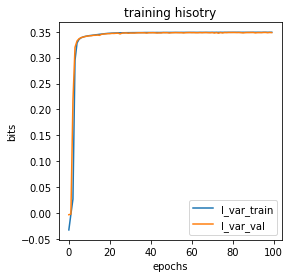

In [14]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values

# Compute likelihood information
I_var, dI_var =  model.I_variational(x=x_test, y=y_test)
print(f'I_var_test: {I_var:.3f} +- {dI_var:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
#ax.axhline(I_var, color='C2', linestyle=':', label='I_var_test')
#ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
#ax.set_ylim([0, I_pred*1.2]);

In [15]:
model.get_nn().layers[2].I_rx.numpy()[0]

-2.56484

In [16]:
interaction_term = model.get_nn().layers[2].get_weights()[4]
crp_weights = np.squeeze(model.get_nn().layers[2].theta_CRP_lc.numpy())
xylR_weights = np.squeeze(model.get_nn().layers[2].theta_xylR_lc.numpy())
rnap_weights = np.squeeze(model.get_nn().layers[2].theta_RNAP_lc.numpy())

I_cx = model.get_nn().layers[2].I_cx.numpy()[0]
I_rx = model.get_nn().layers[2].I_rx.numpy()[0]
#print(f'interaction term = {interaction_term[0]:.3f} k_bT')

In [17]:
# -1.954364, -2.5270987
# -1.9444253, -2.5044086
I_cx*0.62, I_rx*0.62

(-1.3222013998031616, -1.5902008485794068)

In [18]:
crp_df = pd.DataFrame(crp_weights,columns=model.alphabet)
xylR_df = pd.DataFrame(xylR_weights,columns=model.alphabet)
rnap_df = pd.DataFrame(rnap_weights,columns=model.alphabet)

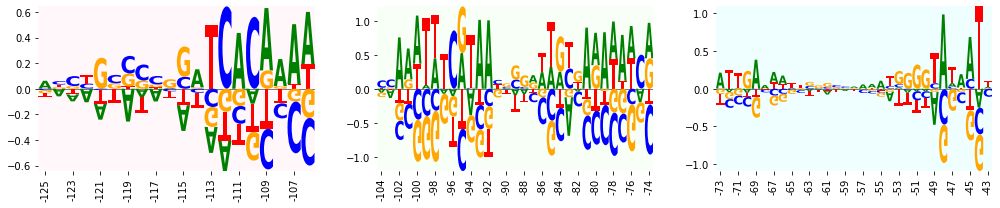

In [19]:
# # Get G-P map parameters in matrix form
# theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# # Create figure with two panels
fig, axs = plt.subplots(1,3,figsize=[14,3])

tick_spacing=2
crp_logo  = logomaker.Logo(-crp_df,ax=axs[0],center_values=True)
crp_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
crp_logo.style_spines(visible=False)
crp_logo.highlight_position_range(0,21,alpha=0.5,color='lavenderblush',label='CRP')
#crp_logo.style_glyphs_in_sequence(sequence='.TGTGA......TCACA...', color='darkred')
crp_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-125,-107+1,tick_spacing))

xylR_logo = logomaker.Logo(-xylR_df,ax=axs[1],center_values=True)
xylR_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
xylR_logo.style_spines(visible=False)
xylR_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-104,-74+1,tick_spacing))
xylR_logo.highlight_position_range(0,31,alpha=0.5,color='honeydew',label='RNAP')

rnap_logo = logomaker.Logo(-rnap_df,ax=axs[2],center_values=True)
rnap_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
rnap_logo.style_spines(visible=False)
rnap_logo.highlight_position_range(0,31,alpha=0.5,color='lightcyan',label='RNAP')
rnap_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-73,-42+1,tick_spacing))

# # # Right panel: draw measurement process as heatmap
# ax = axs[3]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
#fig.savefig('thermodynmic_custom_gpmap_mpa_visualization_xylE.pdf',bbox_index='tight',dpi=500)
# plt.show()

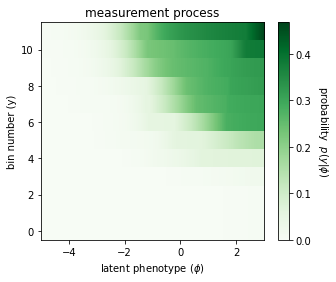

In [20]:
fig, ax = plt.subplots(1,1,figsize=[5,4])

im = ax.imshow(np.sort(np.sort(measurement_process,axis=1),axis=0),
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
#ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

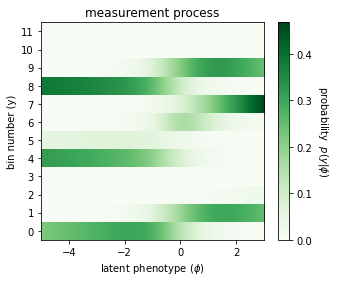

In [21]:
fig, ax = plt.subplots(1,1,figsize=[5,4])

#im = ax.imshow(np.sort(measurement_process,axis=0),
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

In [22]:
# # # Create figure with two panels
# fig, axs = plt.subplots(1,1,figsize=[3.5,1.6])

# tick_spacing=3
# # crp_logo  = logomaker.Logo(-0.62*crp_df,ax=axs,center_values=True)
# # crp_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
# # crp_logo.style_spines(visible=False)
# # crp_logo.highlight_position_range(0,21,alpha=0.1,color='#9981B3',label='CRP')
# # #crp_logo.style_glyphs_in_sequence(sequence='.TGTGA......TCACA...', color='darkred')
# # crp_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-125,-107+1,tick_spacing))
# # #axs.set_xlabel('Position l')
# # crp_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
# # axs.set_yticks([-0.25,0,0.25])
# # fig.savefig('xylE_figure/crp_logo.png',bbox_inches='tight',dpi=200)
# # plt.show()

# xylR_logo = logomaker.Logo(-0.62*xylR_df,ax=axs,center_values=True)
# xylR_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
# xylR_logo.style_spines(visible=False)
# xylR_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-104,-74+1,tick_spacing))
# xylR_logo.highlight_position_range(0,31,alpha=0.1,color='#b6cc34',label='xylR')
# xylR_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
# axs.set_yticks([-0.5, 0, 0.5])
# #fig.savefig('xylR_logo.png',bbox_inches='tight',dpi=200)
# plt.show()

# # rnap_logo = logomaker.Logo(-0.62*rnap_df,ax=axs,center_values=True)
# # rnap_logo.style_xticks(anchor=0, spacing=tick_spacing, rotation=90)
# # rnap_logo.style_spines(visible=False)
# # rnap_logo.highlight_position_range(0,31,alpha=0.7,color='lightcyan',label='RNAP')
# # rnap_logo.ax.set_xticklabels('%+d'%x for x in np.arange(-73,-42+1,tick_spacing))
# # rnap_logo.ax.set_ylabel("$-\Delta \Delta G$ (kcal/mol)", labelpad=-1)
# # axs.set_xlabel('Position (relative to xylE gene)')
# # axs.set_yticks([-0.5, 0, 0.5])
# # axs.xaxis.set_label_coords(0.5, -0.39)
# # fig.savefig('xylE_figure/rnap_logo.png',bbox_inches='tight',dpi=200)
# # plt.show()

In [43]:
x_train = data_df['x'].values

In [44]:
number_of_seqs_to_simulate = x_train.shape[0]+x_test.shape[0]
number_of_seqs_to_simulate

1379852

In [35]:
import time

start = time.time()
sim_df = model.simulate_dataset(1000)
end = time.time()
print(end - start)


0.19690704345703125


In [36]:
sim_df
ix_test = sim_df['set']=='test'
test_df = sim_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

test N: 199


In [45]:
number_of_seqs_to_simulate = 500000
I_cxs = []
I_xrs = []
for model_number in range(10):
    
    sim_df_new = model.simulate_dataset(number_of_seqs_to_simulate)
    sim_df_new.to_csv(f'21.12.19.sim_dfs_xylE/sim_df_{model_number}.csv.gz')
    
    y_cols_sim = sim_df_new.columns[1:-1]
    # Separate test from data_df
    ix_test = sim_df_new['set']=='test'
    test_df = sim_df_new[ix_test].reset_index(drop=True)
    #print(f'test N: {len(test_df):,}')

    # Remove test data from data_df
    sim_df_new = sim_df_new[~ix_test].reset_index(drop=True)
    #print(f'training + validation N: {len(sim_df_new):,}')
    #sim_df.head()
    
    # Create model
    sim_model = mavenn.Model(L=L, 
                             Y=Y,
                             alphabet='dna', 
                             regression_type='MPA', 
                             gpmap_type='custom',
                             gpmap_kwargs=gpmap_kwargs,
                             custom_gpmap=ThermodynamicLayer)
    
    # Set training data
    sim_model.set_data(x=sim_df_new['x'],
                       y=sim_df_new[y_cols_sim],
                       validation_flags=(sim_df_new['set']=='validation'),
                       shuffle=True,
                       verbose=False)

    # Fit model to data
    sim_model.fit(learning_rate=.00025,
                  epochs=500,
                  batch_size=500,
                  early_stopping=True,
                  early_stopping_patience=25,
                  linear_initialization=False,
                  verbose=False)
    
    I_cx_sim = sim_model.get_nn().layers[2].I_cx.numpy()[0]
    I_rx_sim = sim_model.get_nn().layers[2].I_rx.numpy()[0]
    
    I_cxs.append(I_cx_sim*0.62)
    I_xrs.append(I_rx_sim*0.62)
    
    sim_model.save(f'21.12.19.sim_dfs_xylE/sim_model_{model_number}', verbose=False)
    print(f'model number = {model_number}, I_cx =  {I_cx_sim*0.62}, I_rx {I_rx_sim*0.62}')
    

Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f8735f5bbe0>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1136.3 seconds
model number = 0, I_cx =  -1.058278591632843, I_rx -1.5169657373428345


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f8735f56898>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1126.6 seconds
model number = 1, I_cx =  -1.9991697120666503, I_rx -1.699657950401306


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f91673ca2e8>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1136.0 seconds
model number = 2, I_cx =  -1.11902982711792, I_rx -1.5306730413436889


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f9719d29e10>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 777.7 seconds
model number = 3, I_cx =  -1.0872175884246826, I_rx -1.5490790843963622


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f80768459b0>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 921.9 seconds
model number = 4, I_cx =  -1.082081377506256, I_rx -1.5428711080551147


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f807bce1898>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1127.0 seconds
model number = 5, I_cx =  -1.1179259848594665, I_rx -1.5333170890808105


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f873688de10>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1089.9 seconds
model number = 6, I_cx =  -1.108266496658325, I_rx -1.521855902671814


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f915644e358>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1120.3 seconds
model number = 7, I_cx =  -2.002158031463623, I_rx -1.6838969898223877


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f91673ca4a8>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1065.7 seconds
model number = 8, I_cx =  -1.0922476649284363, I_rx -1.5308365297317506


Exception ignored in: <bound method tqdm.__del__ of <tqdm.auto.tqdm object at 0x7f72fc9daba8>>
Traceback (most recent call last):
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/std.py", line 1147, in __del__
    self.close()
  File "/Users/tareen/miniconda3/lib/python3.6/site-packages/tqdm/notebook.py", line 289, in close
    self.disp(bar_style='success', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Training time: 1119.8 seconds
model number = 9, I_cx =  -1.107904634475708, I_rx -1.5360734796524047


results for interaction energies

In [49]:
print(np.mean(I_cxs),np.std(I_cxs))
print(np.mean(I_xrs),np.std(I_xrs))


-1.277427990913391 0.36203423876702456
-1.5645226912498473 0.06431553444496807


In [50]:
I_cxs

[-1.058278591632843,
 -1.9991697120666503,
 -1.11902982711792,
 -1.0872175884246826,
 -1.082081377506256,
 -1.1179259848594665,
 -1.108266496658325,
 -2.002158031463623,
 -1.0922476649284363,
 -1.107904634475708]

In [51]:
I_xrs

[-1.5169657373428345,
 -1.699657950401306,
 -1.5306730413436889,
 -1.5490790843963622,
 -1.5428711080551147,
 -1.5333170890808105,
 -1.521855902671814,
 -1.6838969898223877,
 -1.5308365297317506,
 -1.5360734796524047]